<div style="font-family: monospace; white-space: pre; font-size: 10px;">
DDDDDDDD               DDDDDDDDAAAAAAAAAAAAAAAAAAAAAATTTTTTTTTTTTT      UUUUUUUUUUUUUUUUU   MMMMMMMMMM
D:::::::D             D:::::::DA::::::::::::::::::::AT::::::::::::TTT   U::::::::::::::::U  M::::::::M
D::::::::D           D::::::::DA::::::::::::::::::::AT:::::::::::::::TT U::::::UUUUUU:::::U M::::::::M
D:::::::::D         D:::::::::DAA::::::AAAAAAAAA::::ATTT:::::TTTTT:::::TUU:::::U     U:::::UMM::::::MM
D::::::::::D       D::::::::::D  A:::::A       AAAAAA  T:::::T    T:::::T U::::U     U:::::U  M::::M
D:::::::::::D     D:::::::::::D  A:::::A               T:::::T     T:::::TU::::U     U:::::U  M::::M
D:::::::D :::D   D:::::D :::::D  A::::::AAAAAAAAAA     T:::::T     T:::::TU::::UUUUUU:::::U   M::::M
D::::::D D::::D D::::D D::::::D  A:::::::::::::::A     T:::::T     T:::::TU:::::::::::::UU  * M::::M
D::::::D  D::::D :::D  D::::::D  A:::::::::::::::A     T:::::T     T:::::TU::::UUUUUU:::::U   M::::M
D::::::D   D:::::::D   D::::::D  A::::::AAAAAAAAAA     T:::::T     T:::::TU::::U     U:::::U  M::::M
D::::::D    D:::::D    D::::::D  A:::::A               T:::::T     T:::::TU::::U     U:::::U  M::::M
D::::::D     DD:DD     D::::::D  A:::::A       AAAAAA  T:::::T    T:::::T U::::U     U:::::U  M::::M
D::::::D      DDD      D::::::DAA::::::AAAAAAAA:::::ATTT:::::TTTTT:::::TUU:::::U     U:::::UMM::::::MM
D::::::D       D       D::::::DA::::::::::::::::::::AT:::::::::::::::TT U::::::U     U:::::UM::::::::M
D::::::D               D::::::DA::::::::::::::::::::AT::::::::::::TTT   U::::::U     U:::::UM::::::::M
DDDDDDDD               DDDDDDDDAAAAAAAAAAAAAAAAAAAAAATTTTTTTTTTTTT      UUUUUUUU     UUUUUUUMMMMMMMMMM
                                                                                                      &copy;
<!-- Thanks to https://patorjk.com/ for the ASCII artwork -->
</div>

---
# Sentiment Analysis with Support Vector Machines
## <font color="red">Multinomial Naive Bayes</font>
Welcome to the Sentiment Analysis Course! In this exciting journey, we will explore the fascinating world of understanding emotions through text. Sentiment analysis, also known as opinion mining, empowers us to decipher the sentiments, attitudes, and opinions expressed in written communication. Whether you're interested in social media analysis, customer feedback evaluation, or gaining deeper insights into human behavior, this course will equip you with the essential tools and techniques to effectively analyze sentiment. Let's dive in and unlock the power of sentiment analysis together!

---

## Importing Relevant Packages

In [2]:
# Import necessary libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# from imblearn.over_sampling import SMOTE
from gensim.parsing.preprocessing import remove_stopwords
import nltk  # Import NLTK (Natural Language Toolkit) for natural language processing tasks
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, LancasterStemmer
from nltk.stem.snowball import EnglishStemmer
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt  # Import Matplotlib for data visualization
import pandas  as pd # Import Pandas for data manipulation and analysis
import numpy as np # Import Numpy for math
import re
import os
nltk.download('punkt')
nltk.download('wordnet')

# Options for pandas
pd.options.display.max_columns = None

c:\Users\kmedr\anaconda3\envs\pypi_llm\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\kmedr\anaconda3\envs\pypi_llm\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\kmedr\anaconda3\envs\pypi_llm\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kmedr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kmedr\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Data Loading and Preprocessing

### Data Loading

If using Google Drive, mount the drive and copy the path to the data file.

In [ ]:
# Mount Google Drive
# drive.mount('/content/drive')

In [3]:
# Checking the current working directory
os.getcwd()

'c:\\Users\\kmedr\\My Drive\\Sentiment_Analysis_Omdena\\Codeing'

In [4]:
# Load the preprocessed tweet dataset into a DataFrame
df = pd.read_csv('Tweets.csv')

In [5]:
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [6]:
df.shape

(27481, 4)

### Data Preprocessing

#### Check for Missing Values

In [7]:
null_counts = df.isnull().sum()
print(null_counts)

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64


#### Remove Missing Values

In [8]:
df = df.dropna()

In [9]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27480 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27480 non-null  object
dtypes: object(4)
memory usage: 1.0+ MB


#### Remove Unwanted Columns

In [10]:
# Drop unnecessary columns
df.drop(['textID', 'selected_text'], axis=1, inplace=True)

In [11]:
df.head(10)

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative
5,http://www.dothebouncy.com/smf - some shameles...,neutral
6,2am feedings for the baby are fun when he is a...,positive
7,Soooo high,neutral
8,Both of you,neutral
9,Journey!? Wow... u just became cooler. hehe....,positive


### Create Labels

Create labels using `.map`.

In [12]:
# Creating the maps of the labes
df['sentiment'] = df['sentiment'].map(
    {
        'positive': 1,
        'negative': 0,
        'neutral': 2
    }
)

Remove the **neutral** class from the dataset.

In [13]:
df = df[df['sentiment'] != 2]

In [14]:
df['sentiment'].unique()

array([0, 1], dtype=int64)

In [15]:
df.head(10)

,text,sentiment
1,Sooo SAD I will miss you here in San Diego!!!,0
2,my boss is bullying me...,0
3,what interview! leave me alone,0
4,"Sons of ****, why couldn`t they put them on t...",0
6,2am feedings for the baby are fun when he is a...,1
9,Journey!? Wow... u just became cooler. hehe....,1
11,I really really like the song Love Story by Ta...,1
12,My Sharpie is running DANGERously low on ink,0
13,i want to go to music tonight but i lost my vo...,0
15,"Uh oh, I am sunburned",0


#### Labels
- 0 = Negative
- 1 = Positive

### StopWord Removal
Stopwords are commonly used words in a language that are often considered insignificant or lack meaningful contribution to the overall semantics of a text. These words are typically filtered out or removed during text analysis tasks, such as sentiment analysis, to focus on more important and meaningful words. Examples of stopwords in English include articles (e.g., "a", "an", "the"), pronouns (e.g., "I", "you", "he", "she"), prepositions (e.g., "in", "on", "at"), and conjunctions (e.g., "and", "but", "or"). By removing stopwords, text analysis algorithms can often improve efficiency and accuracy by eliminating noise and reducing the dimensionality of the data.
### Lowercasing
### Removing Special Characters, Mentions, Hashtags
### Tokenization(Tweets)
Tokenization is the process of breaking down a text or sentence into smaller units called tokens. These tokens can be individual words, phrases, or even characters, depending on the granularity of the tokenization technique used. Tokenization helps in preparing text data for analysis or processing by splitting it into meaningful and manageable components. It serves as a foundational step in various natural language processing (NLP) tasks, such as text classification, language modeling, and information retrieval.
### Lemmatization / Stemming (Tweets)
Lemmatization and stemming are techniques used in natural language processing to reduce words to their base or canonical forms, but they have different approaches and outcomes.
Lemmatization:
- Lemmatization aims to obtain the lemma or base form of a word.
- It considers the word's morphological analysis and applies language rules to determine the base form.
- Lemmatization typically produces valid words that are present in the language's dictionary.
- For example, the lemmatization of "running" would be "run", and the lemmatization of "better" would be "good".
Stemming:
- Stemming is a simpler and more heuristic-based approach.
- It reduces words to their stem or root form by removing suffixes or prefixes.
- Stemming does not guarantee that the resulting stem is a valid word.
- For example, the stemming of "running" would be "run", but the stemming of "better" would be "bet".
In summary, lemmatization provides linguistically accurate base forms, while stemming focuses on heuristics to derive word stems. Lemmatization tends to yield better results in terms of semantic accuracy, but it can be computationally more expensive than stemming. The choice between lemmatization and stemming depends on the specific requirements and objectives of your application or analysis.




#### Creating a single preprocessing function and applying it to the dataset
We will create a single function that will perform all the preprocessing steps we have mentioned above and apply it to the dataset.  
This will make our preprocessing pipeline more efficient and easier to replicate on other datasets.  
We will use the `re` library to perform regular expression operations.  
  
<font color="red">**The main change here was to completely remove the @ and # symbols and text associated with them, and to use a slightly different set of code.**</font>

In [16]:
def preprocess_text(text):
    # Remove mentions (@username) and hashtags (#tech)
    text = re.sub(r'@\w+|#', '', text)
    
    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # remove extra whitespace
    text = ' '.join(text.split())

    # Removing stopwords and convert the text to lowercase
    text = remove_stopwords(text.lower())

    # Tokenization
    text = word_tokenize(text)

    #lemmatization
    # lemma = EnglishStemmer()
    lemma = WordNetLemmatizer()
    # text = ' '.join([lemma.stem(word) for word in text])
    text = ' '.join([lemma.lemmatize(word) for word in text])
    return text

Apply the `preprocess_text` function to create a new column 'preprocessed_text'  
  
We will also take the opportunity to create a **shallow copy** of the dataframe and save it as **'df_cleaned'** for future use. 

In [17]:
df_cleaned = df.copy()
df_cleaned['preprocessed_text'] = df_cleaned['text'].apply(preprocess_text)
df_cleaned.head()

,text,sentiment,preprocessed_text
1,Sooo SAD I will miss you here in San Diego!!!,0,sooo sad miss san diego
2,my boss is bullying me...,0,bos bullying
3,what interview! leave me alone,0,interview leave
4,"Sons of ****, why couldn`t they put them on t...",0,son release bought
6,2am feedings for the baby are fun when he is a...,1,2am feeding baby fun smile coo


In [18]:
## Dropping the previous text column because it has now become redundant.
df_cleaned.drop('text', axis=1, inplace=True)
df_cleaned.head()

,sentiment,preprocessed_text
1,0,sooo sad miss san diego
2,0,bos bullying
3,0,interview leave
4,0,son release bought
6,1,2am feeding baby fun smile coo


In [19]:
df_cleaned['sentiment'].value_counts()

sentiment
1    8582
0    7781
Name: count, dtype: int64

#### Check for Outliers

##### Tweet Length Boxplot

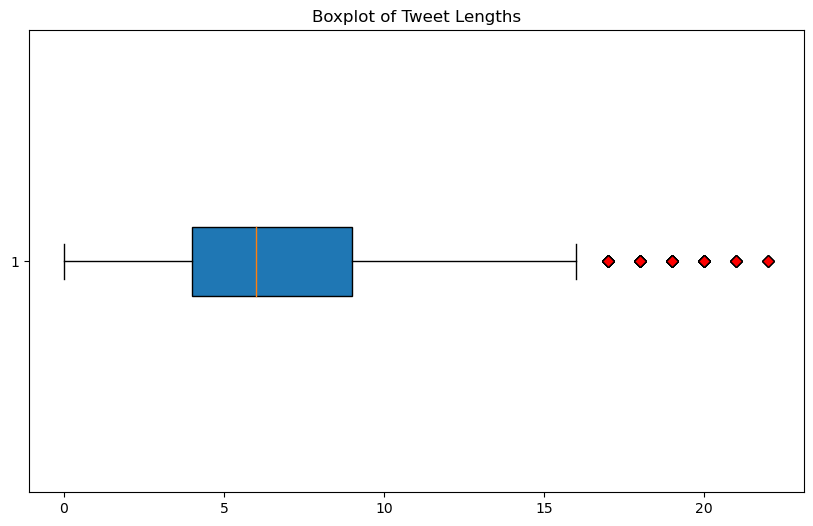

In [20]:
# Assuming `df_cleaned_cleaned` is a DataFrame and 'tweet' is the column with the tweet text
df_cleaned['tweet_length'] = df_cleaned['preprocessed_text'].apply(lambda x: len(x.split()))

# Create boxplot
plt.figure(figsize=(10,6))
plt.boxplot(df_cleaned['tweet_length'], vert=False,
            flierprops=dict(markerfacecolor='r', marker='D'), patch_artist=True)
plt.title('Boxplot of Tweet Lengths')
plt.show()

## Model Building

### Train Test Split
Here we will create the train and test datasets.

In [21]:
# Split the dataset into training and test sets, as `X` and `y` for input features and target variable
X = df_cleaned['preprocessed_text']  # Input features (preprocessed tweets)
y = df_cleaned['sentiment']  # Target variable (sentiment labels)

<font color="red">The only change here that made a difference to the test set was to reduce its size down to 20%.</font>

In [22]:

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13090,), (3273,), (13090,), (3273,))

In [24]:
print(y_train.value_counts())

sentiment
1    6838
0    6252
Name: count, dtype: int64


### Feature Extraction

#### Vectorization
<font color="red">**Here we will use the TF-IDF vectorizer.**</font>

In [125]:
# Feature Extraction: TF-IDF
vectorizer = TfidfVectorizer()
# vectorizer = CountVectorizer(max_features=3000, stop_words='english', lowercase=True)
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [126]:
X_train_vectors = X_train_vectors.toarray()

In [127]:
X_test_vectors = X_test_vectors.toarray()

### Deep Learning - <font color="red">Multilayer Perceptron - MLP (feed-forward neural network)</font>

In [166]:
# Import the required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adamax, Nadam

# Choose an optimizer
# opt = SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
# opt = RMSprop(learning_rate=0.001, rho=0.9)
# opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
opt = Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
# opt = Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)

# Create a sequential model
model2 = Sequential()
model2.add(Dense(32, activation='relu', input_dim=X_train_vectors.shape[1]))
model2.add(Dropout(0.5))
model2.add(Dense(16, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='sigmoid'))

# Compile the model - We use `binary_crossentropy` as the loss function because we have a two classifications
model2.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train the model
history = model2.fit(X_train_vectors, y_train, epochs=10, batch_size=32, validation_data=(X_test_vectors, y_test))

# Evaluate the model
loss, accuracy = model2.evaluate(X_test_vectors, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Epoch 1/10
410/410 [==============================] - 4s 7ms/step - loss: 0.6560 - accuracy: 0.6223 - val_loss: 0.5592 - val_accuracy: 0.8304
Epoch 2/10
410/410 [==============================] - 3s 7ms/step - loss: 0.4919 - accuracy: 0.7974 - val_loss: 0.3992 - val_accuracy: 0.8466
Epoch 3/10
410/410 [==============================] - 3s 7ms/step - loss: 0.3900 - accuracy: 0.8540 - val_loss: 0.3513 - val_accuracy: 0.8497
Epoch 4/10
410/410 [==============================] - 3s 7ms/step - loss: 0.3346 - accuracy: 0.8824 - val_loss: 0.3282 - val_accuracy: 0.8613
Epoch 5/10
410/410 [==============================] - 3s 7ms/step - loss: 0.2968 - accuracy: 0.9001 - val_loss: 0.3201 - val_accuracy: 0.8659
Epoch 6/10
410/410 [==============================] - 2s 6ms/step - loss: 0.2681 - accuracy: 0.9122 - val_loss: 0.3199 - val_accuracy: 0.8653
Epoch 7/10
410/410 [==============================] - 2s 6ms/step - loss: 0.2420 - accuracy: 0.9232 - val_loss: 0.3180 - val_accuracy: 0.8680
Epoch 

In [167]:
import pickle as pkl

# Save the history object
with open('history.pkl', 'wb') as f:
    pkl.dump(history.history, f)

In [168]:
# Save the model to disk
model2.save('models/sentiment_CNN.h5')

#### Metrics

`y_pred` is an array of probabilities outputted by your model, where each probability represents the model's confidence that the corresponding example belongs to the positive class.  
  
`np.where(y_pred > 0.5, 1, 0)` is using the `numpy.where()` function to create an array of class predictions. Here's how it works:  
  
- `y_pred > 0.5` creates a **Boolean** array where each element is **True** if the corresponding `y_pre`d value is greater than **0.5**, and **False** otherwise.  
- For each element in the **Boolean** array, `numpy.where()` assigns a value of **1** if the element is **True**, and **0** if the element is **False**.  
  
The **0.5** is a threshold that you're using to convert probabilities into class predictions. Essentially, you're saying that if the model thinks there's more than a 50% chance that an example belongs to the positive class, you'll predict it as positive; otherwise, you'll predict it as negative.  
  
If you adjust this threshold, it will affect your model's **precision** and **recall**:  
- If you **lower** the threshold, you'll predict more examples as **positive**, which may increase **recall** (since you're less likely to miss any positive examples) but **decrease** **precision** (since you're more likely to incorrectly predict negative examples as positive).
- If you **raise** the threshold, you'll predict fewer examples as positive, which may increase **precision** (since you're less likely to incorrectly predict negative examples as positive) but decrease **recall** (since you're more likely to miss positive examples).  
  
Choosing the right threshold is a balance between **precision** and **recall**, and the best threshold often depends on the specific application.

In [169]:
from sklearn.metrics import roc_auc_score

# Generate predictions
y_pred = model2.predict(X_test_vectors)

# The predictions are probabilities and need to be converted to binary classification
y_pred_class = np.where(y_pred > 0.5, 1, 0)

# Print the classification report
print(classification_report(y_test, y_pred_class))

# Print the AUC-ROC score
print('AUC-ROC score:', roc_auc_score(y_test, y_pred))


103/103 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1529
           1       0.87      0.88      0.87      1744

    accuracy                           0.87      3273
   macro avg       0.87      0.86      0.86      3273
weighted avg       0.87      0.87      0.87      3273

AUC-ROC score: 0.9411589994059798


#### AUC-ROC score

The **AUC-ROC** score stands for **"Area Under the Receiver Operating Characteristics Curve"**. This metric provides an aggregate measure of performance across all possible classification thresholds. It measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

A perfect classifier's **AUC-ROC** score would be **1.0**, meaning that it has a perfect trade-off between sensitivity (**true positive rate**) and specificity (1 - **false positive rate**). 

A model with an **AUC-ROC** score of **0.5** is no better than random guessing. In other words, it has a 50% chance of distinguishing between positive and negative classes.

So, an **AUC-ROC** score of **0.9411** is very good! This score implies that there is 94.11% chance that the model will be able to distinguish between positive class and negative class. This suggests that your model has a very good measure of separability and is able to predict with high sensitivity and specificity.

In [170]:
# Print the AUC-ROC score
print('AUC-ROC score:', roc_auc_score(y_test, y_pred))

AUC-ROC score: 0.9411589994059798


#### Loss and Accuracy Plots
- ***Loss plot:*** This plot shows how the loss of your model changes during the training process. The 'Train' line represents the loss on the training data and the 'Test' line represents the loss on the test data. Ideally, both lines should decrease over time and eventually plateau. If the training loss continues to decrease while the test loss starts to increase, it's an indication of overfitting.
- ***Accuracy plot:*** This plot shows how the accuracy of your model changes during the training process. The 'Train' line represents the accuracy on the training data and the 'Test' line represents the accuracy on the test data. Ideally, both lines should increase over time and eventually plateau. As with the loss plot, if the training accuracy continues to increase while the test accuracy starts to decrease or plateaus, it's an indication of overfitting.

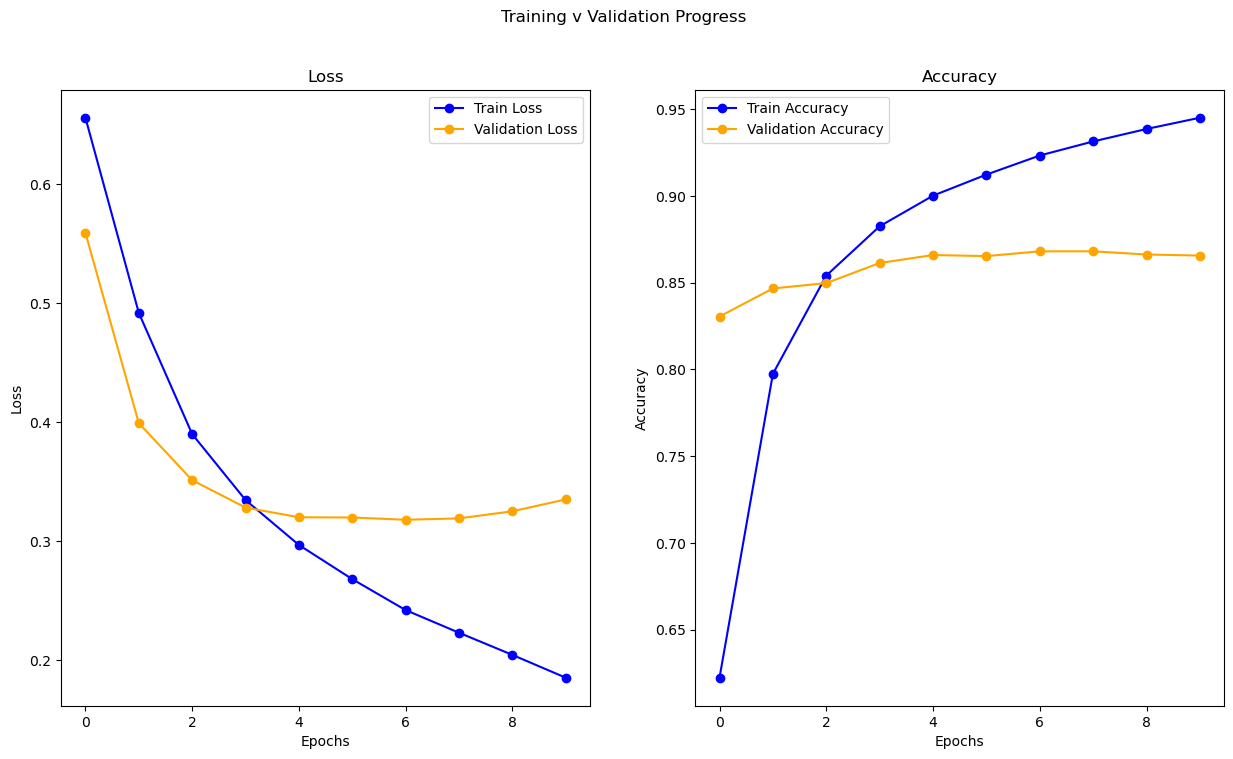

In [189]:
with open('history.pkl', 'rb') as f:
    loaded_hist_dict = pkl.load(f)

# And use it to create the plots
plt.figure(figsize=(15, 8))
plt.suptitle('Training v Validation Progress')

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(loaded_hist_dict['loss'], label='Train Loss', color='blue', marker='o')
plt.plot(loaded_hist_dict['val_loss'], label='Validation Loss', color='orange', marker='o')
plt.title('Loss')
plt.xlabel('Epochs') # Added label for x-axis
plt.ylabel('Loss')   # Added label for y-axis
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(loaded_hist_dict['accuracy'], label='Train Accuracy', color='blue', marker='o')
plt.plot(loaded_hist_dict['val_accuracy'], label='Validation Accuracy', color='orange', marker='o')
plt.title('Accuracy')
plt.xlabel('Epochs')  # Added label for x-axis
plt.ylabel('Accuracy') # Added label for y-axis
plt.legend()

plt.show()

In [201]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplot figure
fig = make_subplots(rows=1, cols=2, subplot_titles=("Loss", "Accuracy"))

# Add a main title and labels
fig.update_layout(
    title_text="Training v Validation Progress",
    xaxis_title="Epochs",
    yaxis_title="Loss",
    xaxis2_title="Epochs",
    yaxis2_title="Accuracy",
    height=600  # Adjusts the height of the plot
    )

# Create a line plot for training loss
fig.add_trace(
    go.Scatter(
        x=list(
            range(
                len(loaded_hist_dict['loss']))),
        y=loaded_hist_dict['loss'],
        mode='lines', name='Train Loss',
        line=dict(color='blue')),
    row=1, col=1)

# Create a line plot for validation loss
fig.add_trace(
    go.Scatter(
        x=list(
            range(
                len(loaded_hist_dict['val_loss']))),
        y=loaded_hist_dict['val_loss'], mode='lines',
        name='Validation Loss', line=dict(color='orange')),
    row=1, col=1)

# Create a line plot for training accuracy
fig.add_trace(
    go.Scatter(
        x=list(
            range(
                len(loaded_hist_dict['accuracy']))),
        y=loaded_hist_dict['accuracy'], mode='lines',
        name='Train Accuracy', line=dict(color='blue')),
    row=1, col=2)

# Create a line plot for validation accuracy
fig.add_trace(
    go.Scatter(
        x=list(
            range(
                len(loaded_hist_dict['val_accuracy']))),
        y=loaded_hist_dict['val_accuracy'], mode='lines',
        name='Validation Accuracy', line=dict(color='orange')),
    row=1, col=2)

# Show the plot
fig.show()

The **Validation Loss**, and **Validation Accuracy** curves indicates there may be overfitting.  
  
Here are a few strategies to mitigate overfitting:

- **Add more data:** The best way to improve the performance of a model and prevent overfitting is to train it on more data. If it's possible to collect more data, that would be the first thing to try.

- **Use data augmentation:** In some cases, you can generate new training samples by augmenting your existing data. In image processing tasks, for example, you can slightly rotate, zoom, or shift your images to create new training samples. For text data, there are techniques like back translation, synonym replacement, etc. However, these techniques depend on the nature of your data and the problem at hand.

- **Add regularization:** Regularization methods like L1 and L2 can help prevent overfitting by adding a cost to the loss function for large weights. Dropout is another form of regularization where randomly selected neurons are ignored during training, which helps prevent the model from becoming too dependent on any single neuron.

- **Reduce the complexity of the model:** If your model has too many parameters, it might be too complex and could overfit the training data. Reducing the number of parameters by using fewer layers or fewer units per layer can help prevent overfitting.

- **Use early stopping:** Keras provides a way to stop the training process when the model's performance on the validation set starts to deteriorate. This is known as early stopping.

##### Load Saved Model

In [172]:
from tensorflow.keras.models import load_model
# Load the saved model
model = load_model('models/sentiment_CNN.h5')

In [173]:
# Make predictions on the test set
y_pred = model.predict(X_test_vectors)

103/103 [==============================] - 0s 973us/step


In [174]:
# The predictions are probabilities and need to be converted to binary classification
y_pred_class = np.where(y_pred > 0.7, 1, 0)

#### Confusion Matrix 
The **confusion matrix** provides a visual representation of the performance of a classification model.  
The **x-axis** represents the **predicted** classes and the **y-axis** represents the **actual** classes.  
Each cell in the **matrix** represents a combination of **actual** and **predicted** classifications.  
The diagonal cells from **top-left** to **bottom-right** represent **correct classifications**, while the other cells represent **incorrect classifications**. 

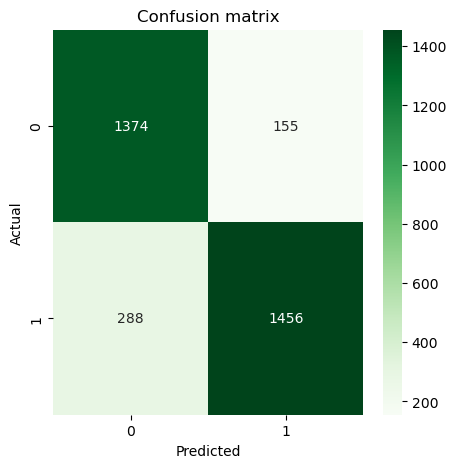

In [175]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix')
plt.show()

#### ROC Curve
The Receiver Operating Characteristic (ROC) curve is a plot that displays the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The area under the curve (AUC) is also often reported, which can be interpreted as the probability that the classifier will assign a higher score to a randomly chosen positive instance than to a randomly chosen negative instance. A perfect classifier would have a curve that goes straight up the y-axis (TPR) and then along the x-axis (FPR). A classifier with no power has a curve that is a diagonal line (the so-called line of no-discrimination).

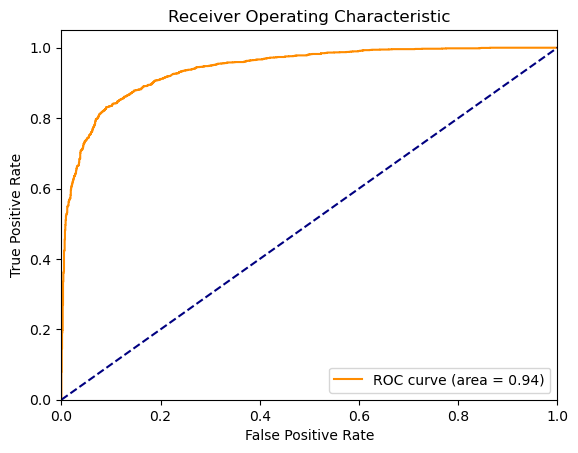

In [176]:
from sklearn.metrics import roc_curve, auc

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()